#**Aula 1**

Os estão disponíveis no [Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data) e são provenientes do *Berkeley Earth Surface Temperature Study*, que combina 1,6 bilhão de relatórios de temperatura de 16 arquivos pré-existentes. 

🎲 Temos os seguintes datasets:
*   Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv)
*   Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
* Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv)
*Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv)
*Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)




> Os dados brutos vêm da página de dados do [Berkeley Earth](http://berkeleyearth.org/data/).

*Neste módulo vamos usar o dataset: Global Average Land Temperature by Country*
> O dataset também está disponível no [github](https://github.com/alura-tech/pos-datascience-time-series-forecasting/blob/main/GlobalLandTemperaturesByCountry.csv) 😉

🎯 **Nosso objetivo: prever as médias de temperatura da superfície da terra no Brasil nos próximos anos.**

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://github.com/alura-tech/pos-datascience-time-series-forecasting/blob/main/GlobalLandTemperaturesByCountry.csv?raw=True')

In [3]:
dados.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [4]:
dados.tail()

dt  AverageTemperature  AverageTemperatureUncertainty   Country
577457  2013-05-01              19.059                          1.022  Zimbabwe
577458  2013-06-01              17.613                          0.473  Zimbabwe
577459  2013-07-01              17.000                          0.453  Zimbabwe
577460  2013-08-01              19.759                          0.717  Zimbabwe
577461  2013-09-01                 NaN                            NaN  Zimbabwe

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
dados_br = dados.query('Country=="Brazil"')

In [7]:
dados_br

dt  AverageTemperature  AverageTemperatureUncertainty Country
77110  1832-01-01              24.935                          1.372  Brazil
77111  1832-02-01              24.505                          1.953  Brazil
77112  1832-03-01              24.617                          1.359  Brazil
77113  1832-04-01              23.990                          2.013  Brazil
77114  1832-05-01              23.124                          1.592  Brazil
...           ...                 ...                            ...     ...
79286  2013-05-01              24.906                          0.236  Brazil
79287  2013-06-01              24.788                          0.251  Brazil
79288  2013-07-01              24.202                          0.201  Brazil
79289  2013-08-01              24.736                          0.247  Brazil
79290  2013-09-01                 NaN                            NaN  Brazil

[2181 rows x 4 columns]

In [8]:
dados_nulos = dados_br.isnull().sum()

In [9]:
dados_nulos

dt                                0
AverageTemperature               17
AverageTemperatureUncertainty    17
Country                           0
dtype: int64

In [10]:
dados_br.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
dados_br.shape

(2164, 4)

In [12]:
dados_br['AverageTemperature'].describe()

count    2164.000000
mean       24.699256
std         0.978787
min        21.797000
25%        24.022500
50%        24.829500
75%        25.449750
max        27.151000
Name: AverageTemperature, dtype: float64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

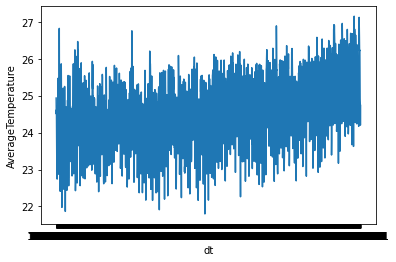

In [14]:
sns.lineplot(x='dt', y='AverageTemperature', data=dados_br)

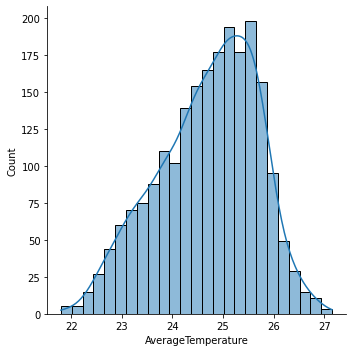

In [15]:
sns.displot(dados_br['AverageTemperature'], kde=True)

In [16]:
dados_br['dt'] = pd.to_datetime(dados_br['dt'], format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
dados_br['Month'] = pd.DatetimeIndex(dados_br['dt']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
dados_br

dt  AverageTemperature  ...  Country Month
77110 1832-01-01              24.935  ...   Brazil     1
77111 1832-02-01              24.505  ...   Brazil     2
77112 1832-03-01              24.617  ...   Brazil     3
77113 1832-04-01              23.990  ...   Brazil     4
77114 1832-05-01              23.124  ...   Brazil     5
...          ...                 ...  ...      ...   ...
79285 2013-04-01              25.464  ...   Brazil     4
79286 2013-05-01              24.906  ...   Brazil     5
79287 2013-06-01              24.788  ...   Brazil     6
79288 2013-07-01              24.202  ...   Brazil     7
79289 2013-08-01              24.736  ...   Brazil     8

[2164 rows x 5 columns]

In [19]:
temperatura = dados_br.groupby(['Month']).mean()

In [20]:
temperatura.drop(columns=['AverageTemperatureUncertainty'], axis=1, inplace=True)

In [21]:
temperatura = temperatura.sort_values(['AverageTemperature'])

In [22]:
temperatura

AverageTemperature
Month                    
6               23.325945
7               23.332978
5               23.971238
8               24.263823
4               24.615188
9               25.114278
3               25.143144
2               25.258972
1               25.263696
12              25.271603
10              25.395045
11              25.452235

<BarContainer object of 12 artists>

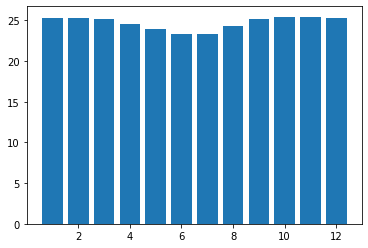

In [23]:
plt.bar(temperatura.index, temperatura['AverageTemperature'].values)

#**Aula 2**

A biblioteca Prophet é usada para criar modelos onde a série é ajustada considerando características não estacionárias, como tendência e sazonalidade.

O modelo ajustado pelo Prophet é do tipo:

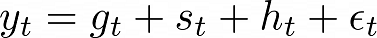

A série usa o termo **g** para modelar a tendência, o **s** para as mudanças periódicas e o **h** para efeitos específicos, como: feriados. O termo de erro **ϵ(𝑡)** representa informações que não foram refletidas no modelo. Geralmente é modelado como ruído distribuído normalmente. 

A tendência pode ser modelada como uma equação de reta. Já, a parte sazonal, utiliza série de Fourier:

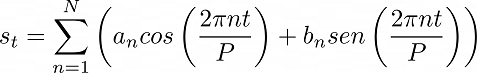

**Exemplo:**

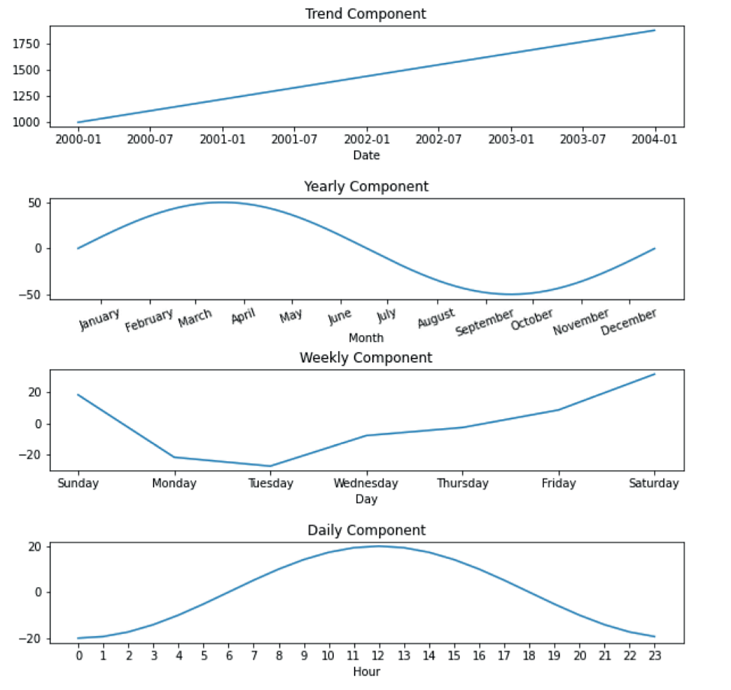

Entendendo a Adição:

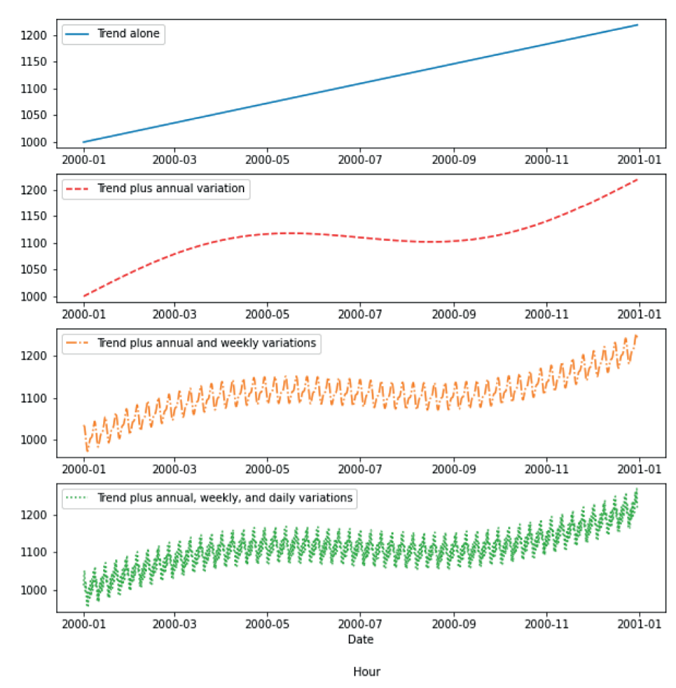

In [24]:
from fbprophet import Prophet

In [25]:
df = pd.DataFrame()

In [26]:
df['ds'] = dados_br['dt']
df['y'] = dados_br['AverageTemperature']

In [27]:
df

ds       y
77110 1832-01-01  24.935
77111 1832-02-01  24.505
77112 1832-03-01  24.617
77113 1832-04-01  23.990
77114 1832-05-01  23.124
...          ...     ...
79285 2013-04-01  25.464
79286 2013-05-01  24.906
79287 2013-06-01  24.788
79288 2013-07-01  24.202
79289 2013-08-01  24.736

[2164 rows x 2 columns]

In [28]:
modelo = Prophet()

In [29]:
modelo.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
dataFramefuture = modelo.make_future_dataframe(periods=0)

In [31]:
previsao = modelo.predict(dataFramefuture)

In [32]:
previsao.head()

ds      trend  ...  multiplicative_terms_upper       yhat
0 1832-01-01  23.962675  ...                         0.0  24.562238
1 1832-02-01  23.963753  ...                         0.0  24.545044
2 1832-03-01  23.964761  ...                         0.0  24.314834
3 1832-04-01  23.965839  ...                         0.0  23.811787
4 1832-05-01  23.966881  ...                         0.0  23.187263

[5 rows x 16 columns]

In [33]:
previsao.head().T

0  ...                    4
ds                          1832-01-01 00:00:00  ...  1832-05-01 00:00:00
trend                                   23.9627  ...              23.9669
yhat_lower                              23.9867  ...              22.6354
yhat_upper                              25.1014  ...              23.7435
trend_lower                             23.9627  ...              23.9669
trend_upper                             23.9627  ...              23.9669
additive_terms                         0.599562  ...            -0.779618
additive_terms_lower                   0.599562  ...            -0.779618
additive_terms_upper                   0.599562  ...            -0.779618
yearly                                 0.599562  ...            -0.779618
yearly_lower                           0.599562  ...            -0.779618
yearly_upper                           0.599562  ...            -0.779618
multiplicative_terms                          0  ...                    0
multiplicative_terms_lower                    0  ...                    0
multiplicative_terms_upper                    0  ...                    0
yhat                                    24.5622  ...              23.1873

[16 rows x 5 columns]

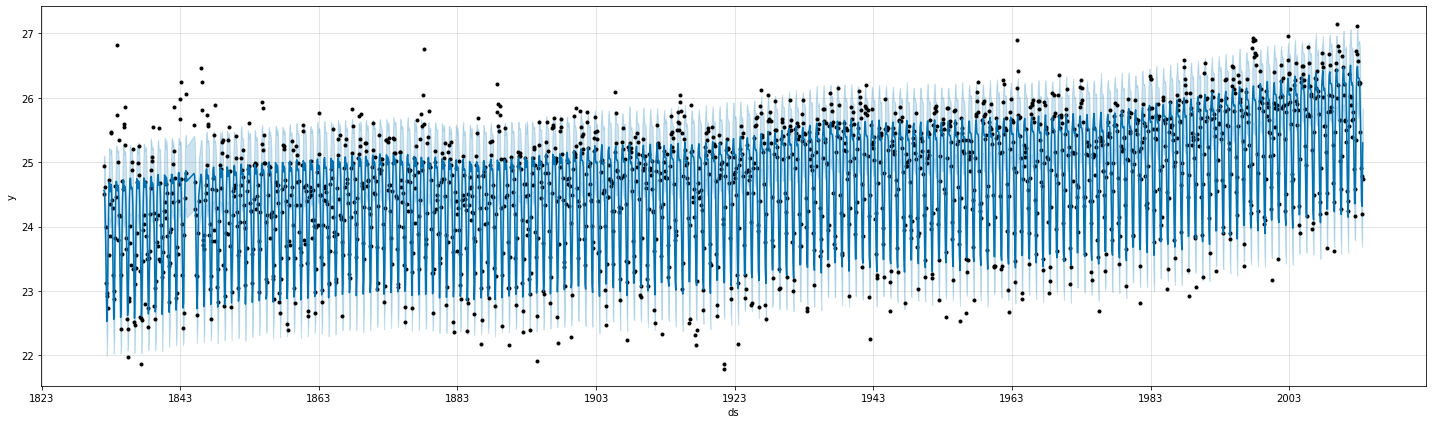

In [34]:
modelo.plot(previsao, figsize=(20,6));

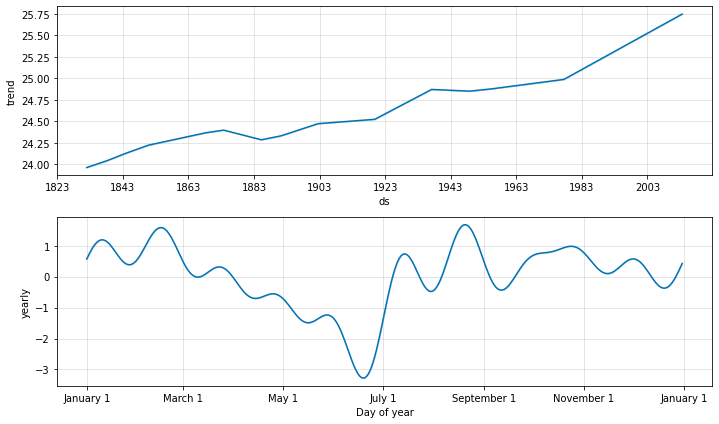

In [35]:
modelo.plot_components(previsao, figsize=(10,6));

###**Adicionando período de previsão**

In [36]:
modelo = Prophet()
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=120, freq='M')
previsao = modelo.predict(dataFramefuture)
previsao.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      trend  ...  multiplicative_terms_upper       yhat
0 1832-01-01  23.962675  ...                         0.0  24.562238
1 1832-02-01  23.963753  ...                         0.0  24.545044
2 1832-03-01  23.964761  ...                         0.0  24.314834
3 1832-04-01  23.965839  ...                         0.0  23.811787
4 1832-05-01  23.966881  ...                         0.0  23.187263

[5 rows x 16 columns]

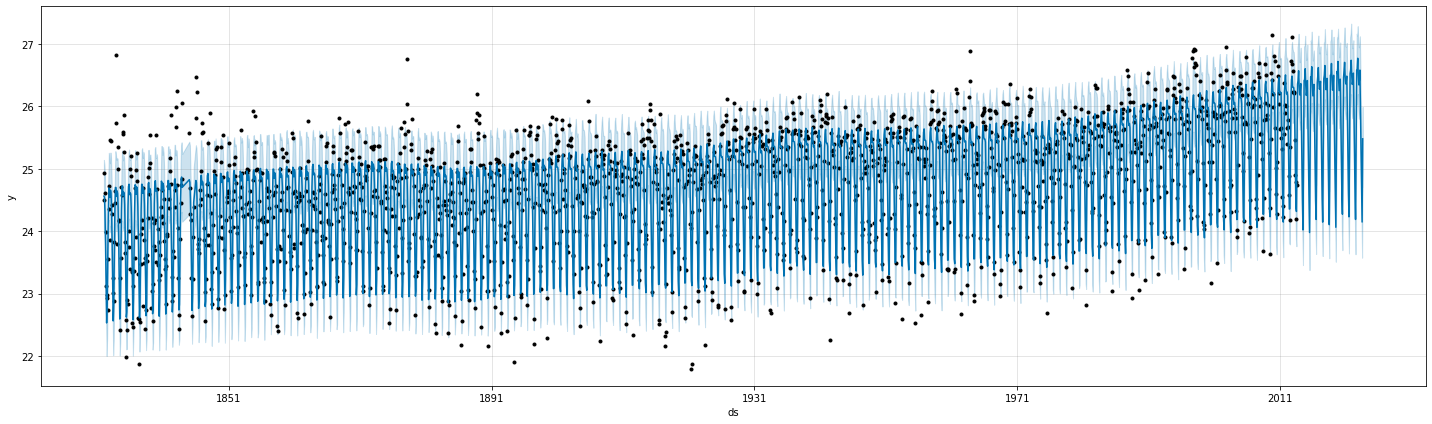

In [37]:
modelo.plot(previsao, figsize=(20,6));

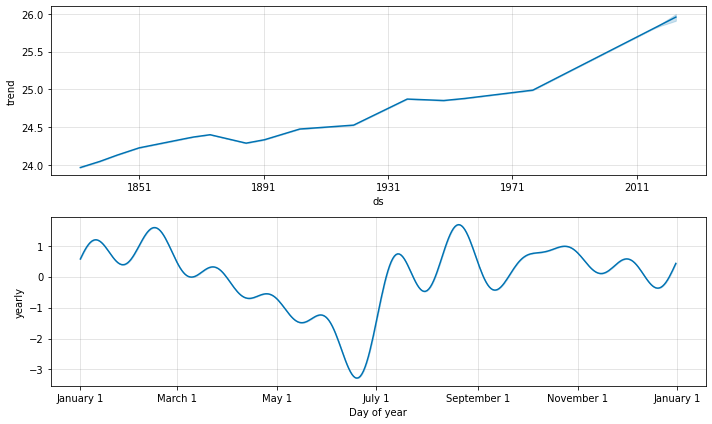

In [38]:
modelo.plot_components(previsao, figsize=(10,6));

#**Aula 3.1**

###**Separando os dados em treino e teste**

In [39]:
df = pd.DataFrame()

In [40]:
df['ds'] = dados_br['dt'][:2000]
df['y'] = dados_br['AverageTemperature'][:2000]

In [41]:
df

ds       y
77110 1832-01-01  24.935
77111 1832-02-01  24.505
77112 1832-03-01  24.617
77113 1832-04-01  23.990
77114 1832-05-01  23.124
...          ...     ...
79121 1999-08-01  24.743
79122 1999-09-01  26.109
79123 1999-10-01  25.922
79124 1999-11-01  25.723
79125 1999-12-01  25.855

[2000 rows x 2 columns]

In [42]:
df_teste = pd.DataFrame()

In [43]:
df_teste['ds'] = dados_br['dt'][2000:]
df_teste['y'] = dados_br['AverageTemperature'][2000:]

In [44]:
df_teste

ds       y
79126 2000-01-01  25.653
79127 2000-02-01  25.463
79128 2000-03-01  25.446
79129 2000-04-01  25.102
79130 2000-05-01  24.614
...          ...     ...
79285 2013-04-01  25.464
79286 2013-05-01  24.906
79287 2013-06-01  24.788
79288 2013-07-01  24.202
79289 2013-08-01  24.736

[164 rows x 2 columns]

In [45]:
modelo = Prophet()
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=150, freq='M')
previsao = modelo.predict(dataFramefuture)
previsao.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      trend  ...  multiplicative_terms_upper       yhat
0 1832-01-01  23.960873  ...                         0.0  24.568724
1 1832-02-01  23.962030  ...                         0.0  24.553922
2 1832-03-01  23.963111  ...                         0.0  24.332085
3 1832-04-01  23.964267  ...                         0.0  23.817152
4 1832-05-01  23.965386  ...                         0.0  23.181518

[5 rows x 16 columns]

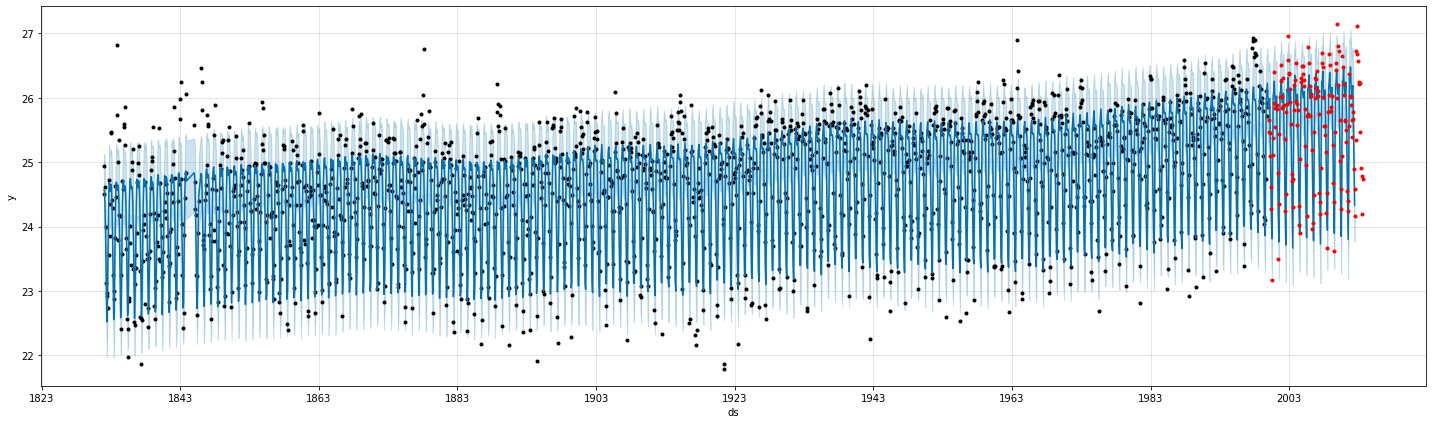

In [46]:
modelo.plot(previsao, figsize=(20,6));
plt.plot(df_teste['ds'], df_teste['y'], '.r')

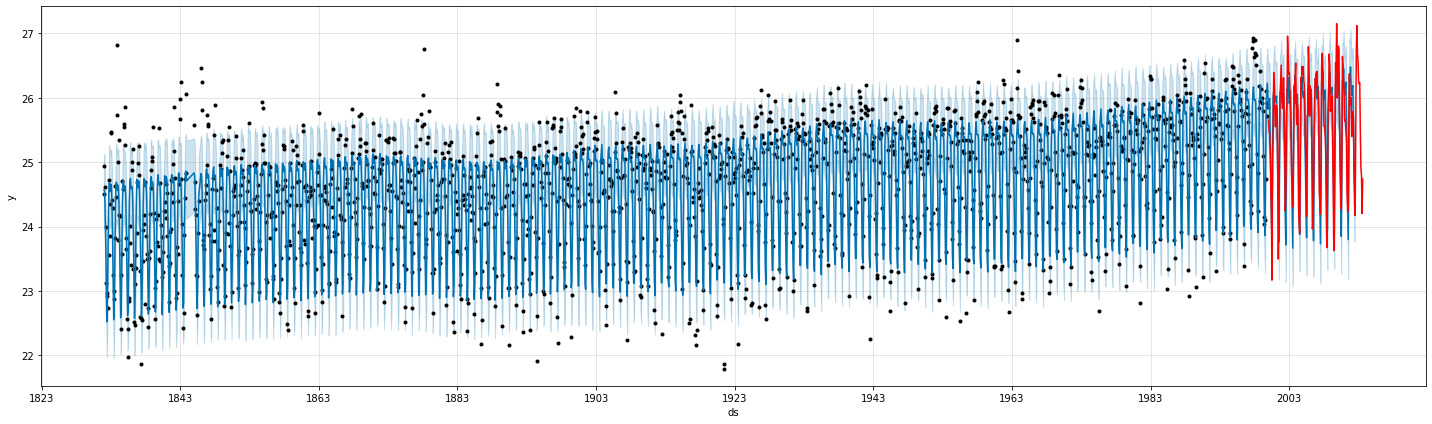

In [47]:
modelo.plot(previsao, figsize=(20,6));
plt.plot(df_teste['ds'], df_teste['y'], '-r')

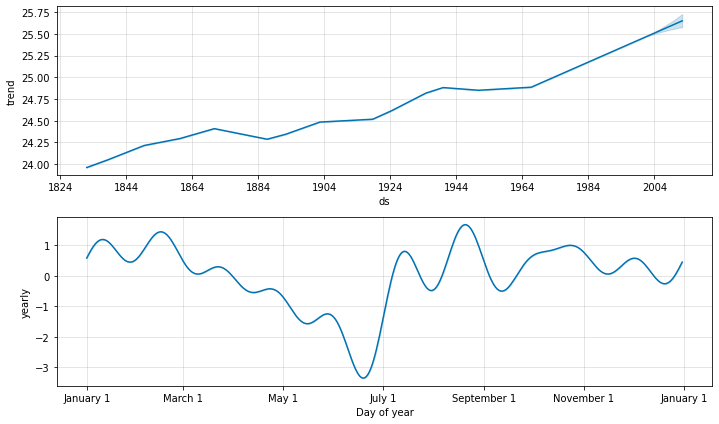

In [48]:
modelo.plot_components(previsao, figsize=(10,6));

###**Changepoints**

In [49]:
from fbprophet.plot import add_changepoints_to_plot

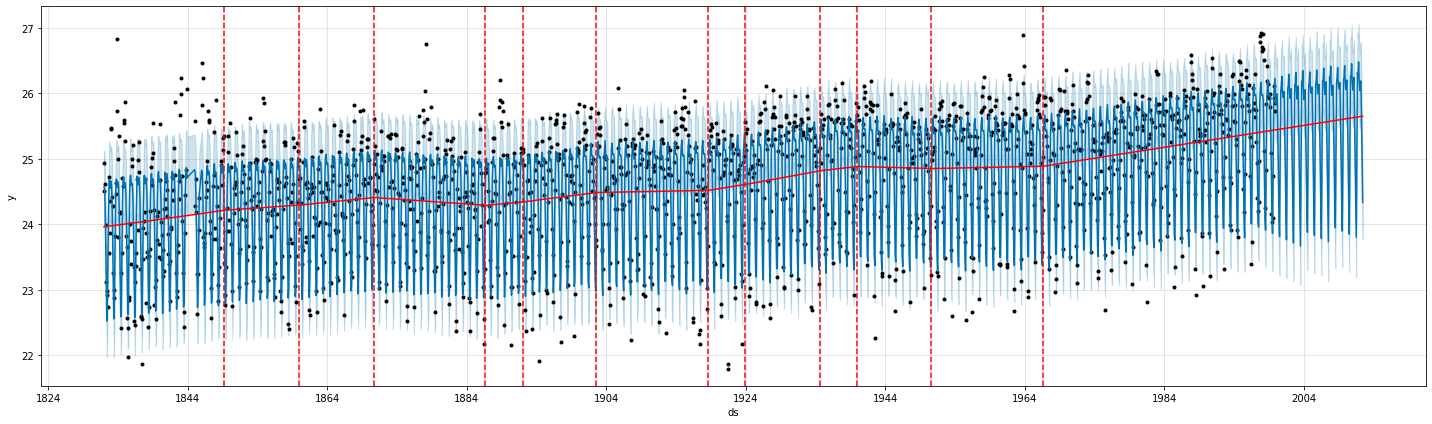

In [50]:
fig = modelo.plot(previsao, figsize=(20,6));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [51]:
modelo = Prophet(n_changepoints=5)
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=150, freq='M')
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


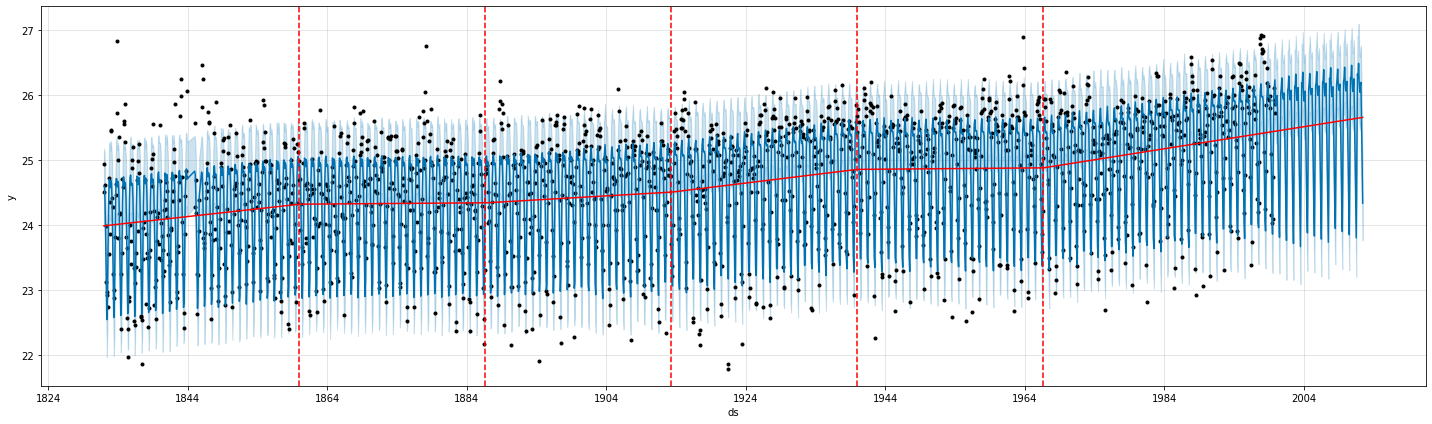

In [52]:
fig = modelo.plot(previsao, figsize=(20,6));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

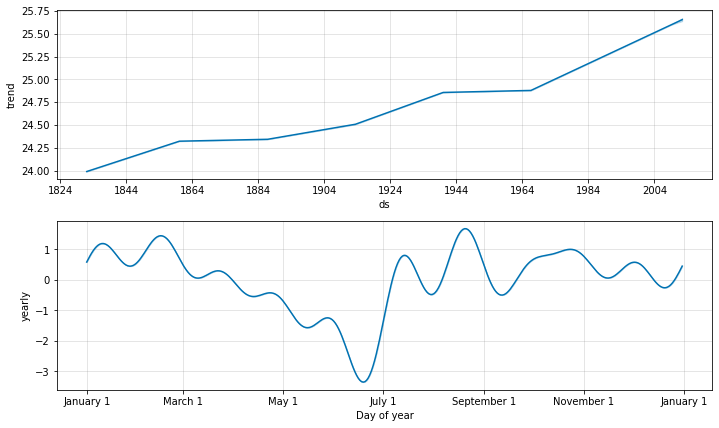

In [53]:
modelo.plot_components(previsao, figsize=(10,6));

####**Alterando o changepoint_range**




In [54]:
modelo = Prophet(n_changepoints=5, changepoint_range=0.9)
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=150, freq='M')
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


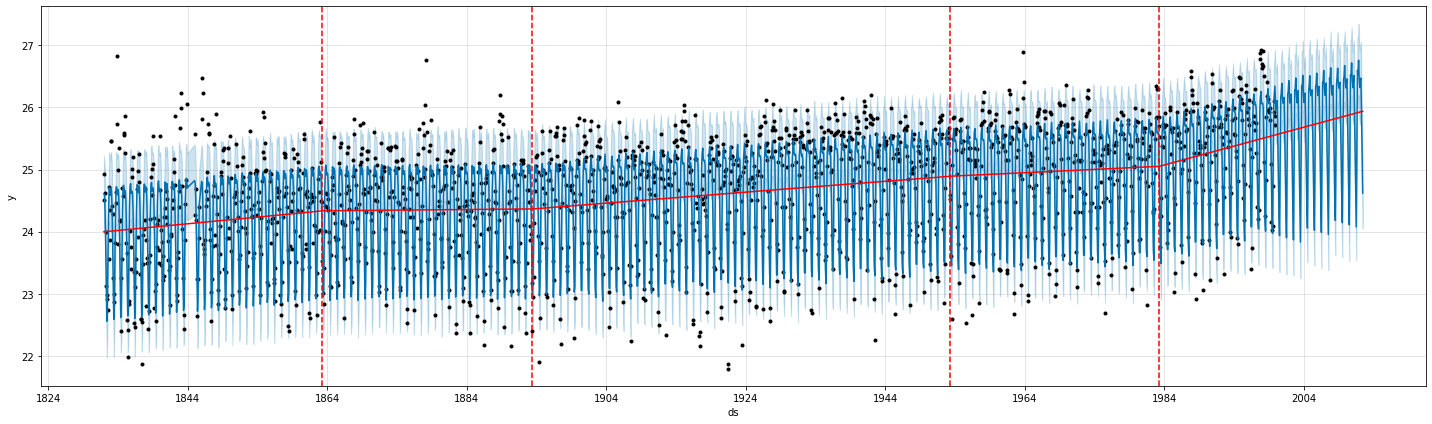

In [55]:
fig = modelo.plot(previsao, figsize=(20,6));
a = add_changepoints_to_plot(fig.gca(), modelo,previsao)

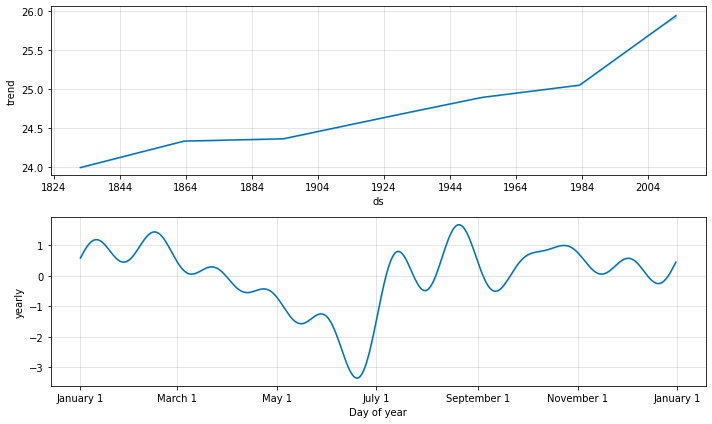

In [56]:
modelo.plot_components(previsao, figsize=(10,6));

####**Flexibilidade dos Changepoints: changepoint_prior_scale**

In [57]:
modelo = Prophet(n_changepoints=25, changepoint_range=0.8, changepoint_prior_scale=0.05)
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=150, freq='M')
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


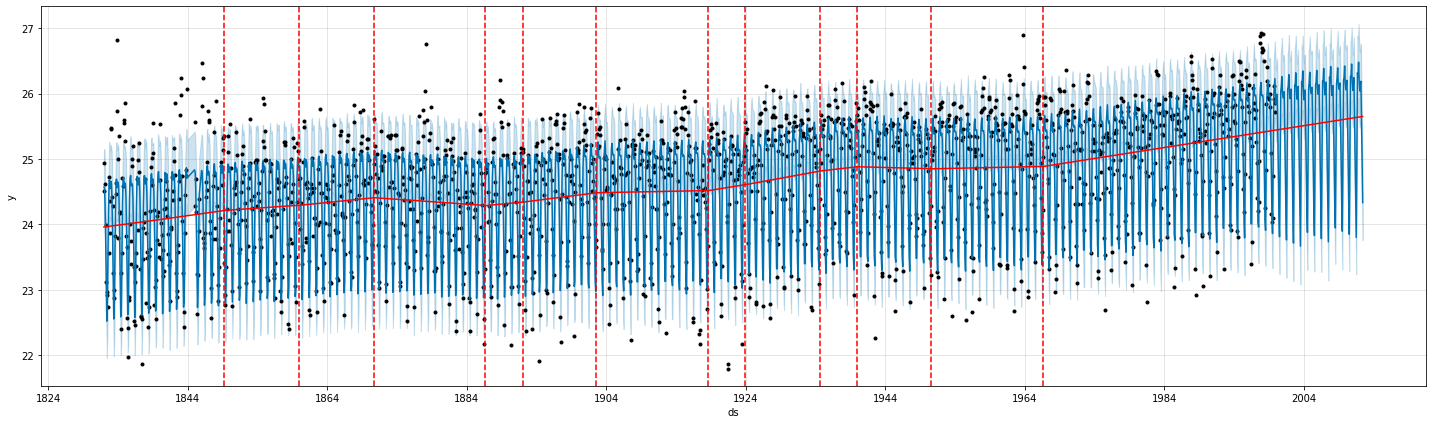

In [58]:
fig = modelo.plot(previsao, figsize=(20,6));
a = add_changepoints_to_plot(fig.gca(), modelo,previsao)

In [59]:
modelo = Prophet(n_changepoints=25, changepoint_range=0.8, changepoint_prior_scale=10)
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=150, freq='M')
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


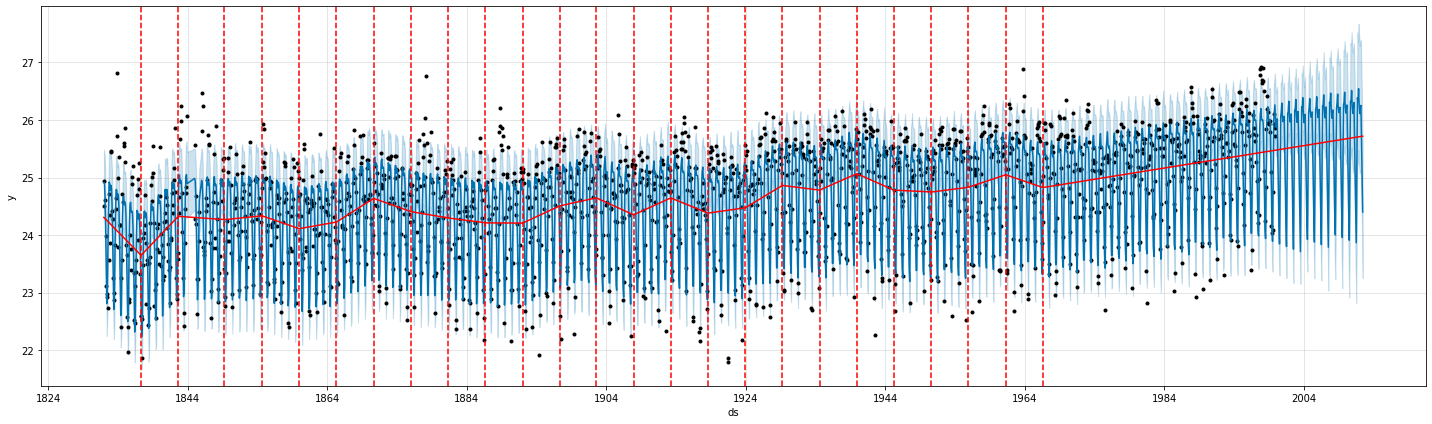

In [60]:
fig = modelo.plot(previsao, figsize=(20,6));
a = add_changepoints_to_plot(fig.gca(), modelo,previsao)

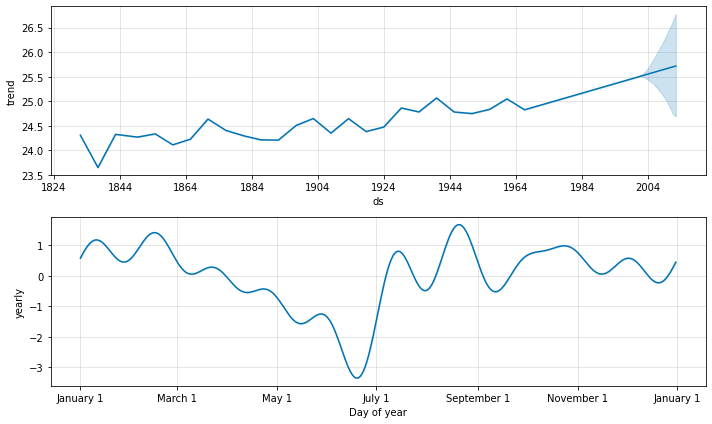

In [61]:
modelo.plot_components(previsao, figsize=(10,6));

#**Aula 3.2**

##**Sazonalidade**

**Aditiva:** quando a série apresenta flutuações sazonais mais ou menos constantes, não importando o nível global da série.

**Multiplicativa:** quando o tamanho das flutuações sazonais variam dependendo do nível global da série.

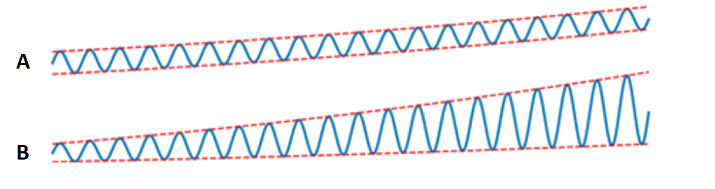

###**Aditiva**

In [62]:
modelo = Prophet(n_changepoints=25, changepoint_range=0.8, seasonality_mode='additive')
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=0)
previsao= modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


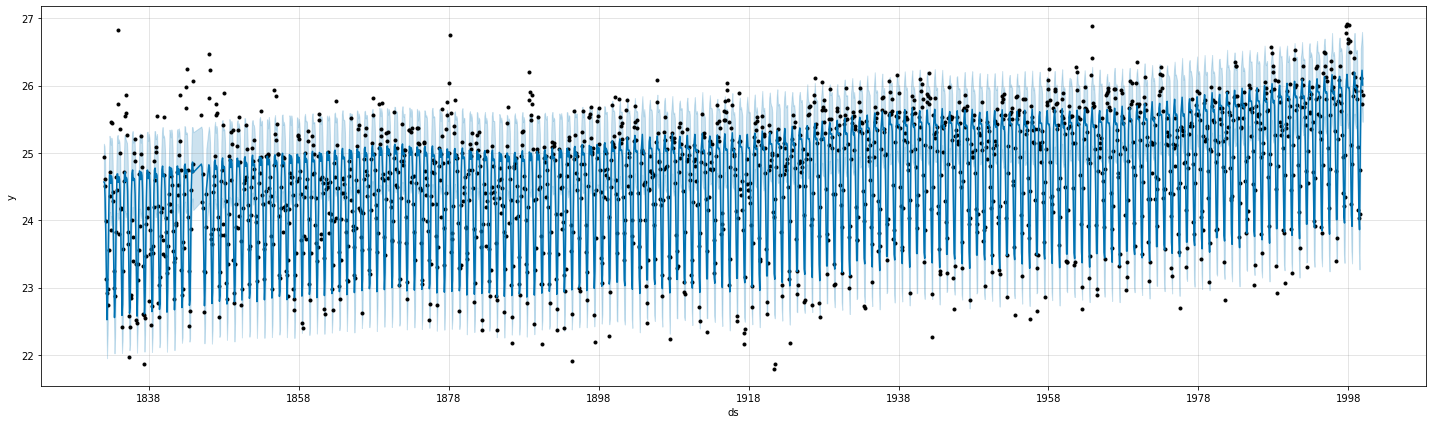

In [63]:
modelo.plot(previsao, figsize=(20,6));

In [64]:
from sklearn.metrics import r2_score 

In [65]:
r2_score(y_true=df['y'], y_pred=previsao['yhat'][:2000])

0.7837418588536078

###**Multiplicativa**

In [66]:
modelo = Prophet(n_changepoints=25, changepoint_range=0.8, seasonality_mode='multiplicative')
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=0)
previsao= modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


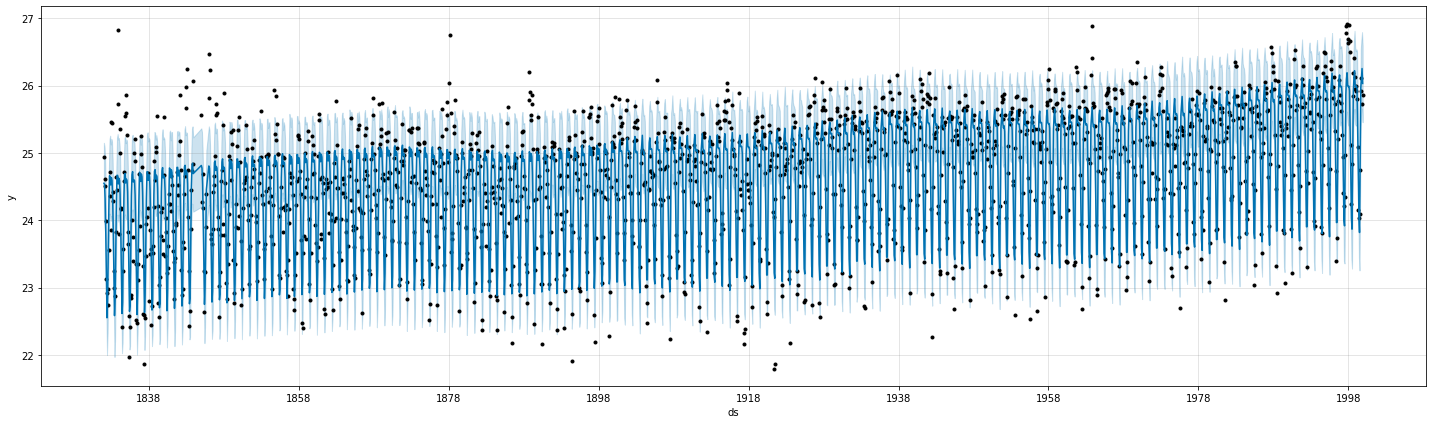

In [67]:
modelo.plot(previsao, figsize=(20,6));

In [68]:
r2_score(y_true=df['y'], y_pred=previsao['yhat'][:2000])

0.7834553481283266

#**Aula 4**


In [69]:
df

ds       y
77110 1832-01-01  24.935
77111 1832-02-01  24.505
77112 1832-03-01  24.617
77113 1832-04-01  23.990
77114 1832-05-01  23.124
...          ...     ...
79121 1999-08-01  24.743
79122 1999-09-01  26.109
79123 1999-10-01  25.922
79124 1999-11-01  25.723
79125 1999-12-01  25.855

[2000 rows x 2 columns]

In [70]:
novo_y = df.reset_index()

In [71]:
novo_y

index         ds       y
0     77110 1832-01-01  24.935
1     77111 1832-02-01  24.505
2     77112 1832-03-01  24.617
3     77113 1832-04-01  23.990
4     77114 1832-05-01  23.124
...     ...        ...     ...
1995  79121 1999-08-01  24.743
1996  79122 1999-09-01  26.109
1997  79123 1999-10-01  25.922
1998  79124 1999-11-01  25.723
1999  79125 1999-12-01  25.855

[2000 rows x 3 columns]

In [72]:
sem_outliers = novo_y[(novo_y['y'] > previsao['yhat_lower'][:2000])&(novo_y['y'] < previsao['yhat_upper'][:2000])]

In [73]:
sem_outliers

index         ds       y
0     77110 1832-01-01  24.935
1     77111 1832-02-01  24.505
2     77112 1832-03-01  24.617
3     77113 1832-04-01  23.990
4     77114 1832-05-01  23.124
...     ...        ...     ...
1995  79121 1999-08-01  24.743
1996  79122 1999-09-01  26.109
1997  79123 1999-10-01  25.922
1998  79124 1999-11-01  25.723
1999  79125 1999-12-01  25.855

[1632 rows x 3 columns]

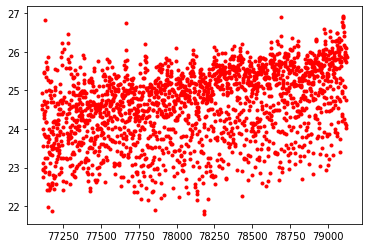

In [74]:
plt.plot(df.index, df['y'], 'r.')

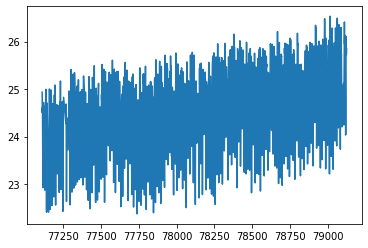

In [75]:
plt.plot(sem_outliers['index'], sem_outliers['y'])

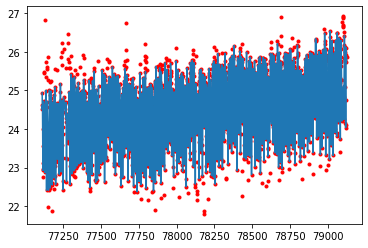

In [76]:
plt.plot(df.index, df['y'], 'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [77]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,6)

In [78]:
df_sem_outliers = sem_outliers[['ds', 'y']]

In [79]:
df_sem_outliers

ds       y
0    1832-01-01  24.935
1    1832-02-01  24.505
2    1832-03-01  24.617
3    1832-04-01  23.990
4    1832-05-01  23.124
...         ...     ...
1995 1999-08-01  24.743
1996 1999-09-01  26.109
1997 1999-10-01  25.922
1998 1999-11-01  25.723
1999 1999-12-01  25.855

[1632 rows x 2 columns]

In [80]:
modelo = Prophet()
modelo.fit(df_sem_outliers)
dataFramefuture = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataFramefuture)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


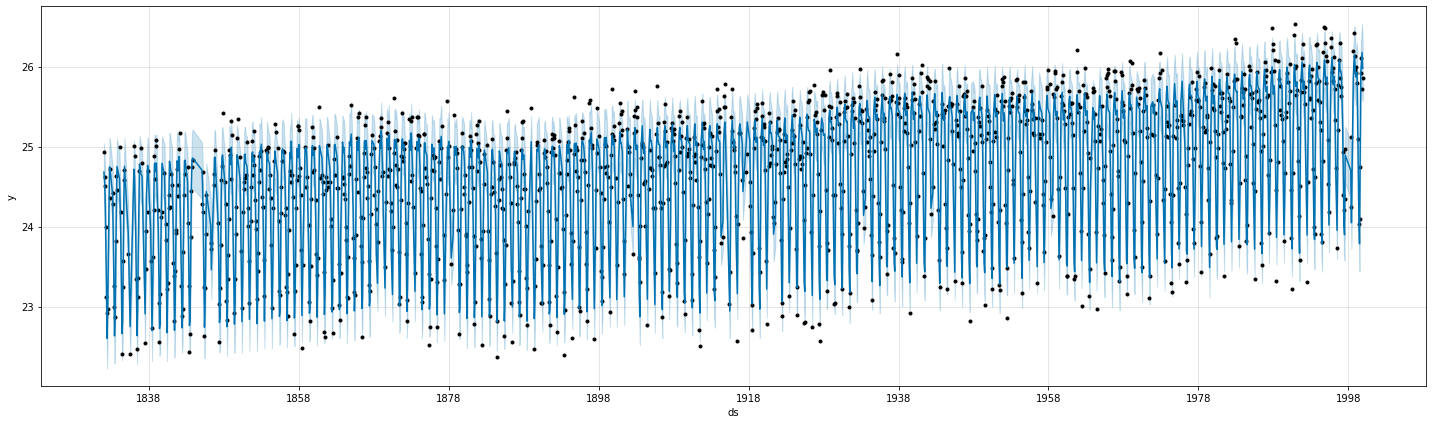

In [81]:
modelo.plot(previsao, figsize=(20,6));

In [82]:
modelo = Prophet(interval_width=0.95)
modelo.fit(df_sem_outliers)
dataFramefuture = modelo.make_future_dataframe(periods=300, freq='M')
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


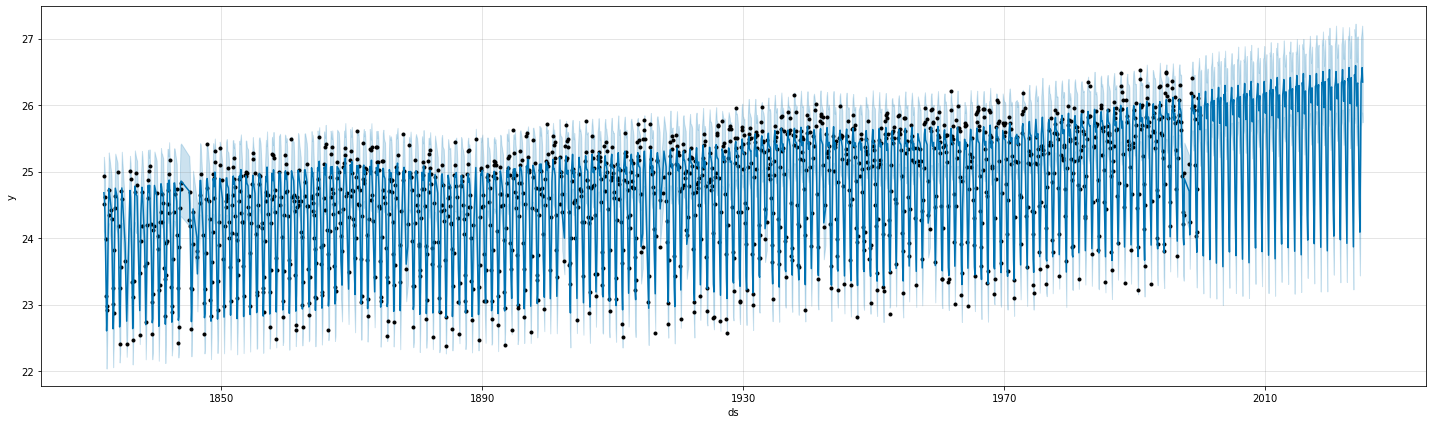

In [83]:
modelo.plot(previsao, figsize=(20,6));

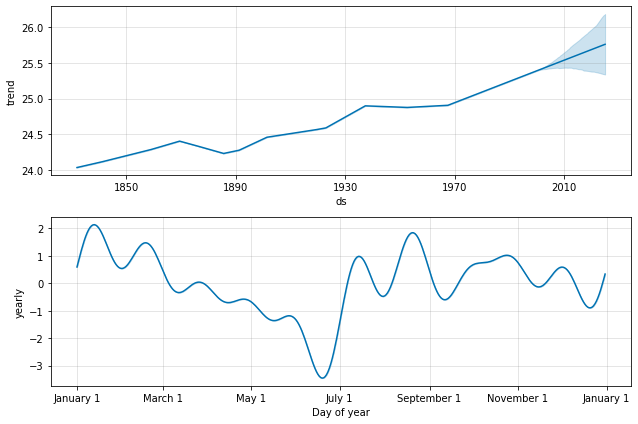

In [84]:
modelo.plot_components(previsao);

In [85]:
amostras = modelo.predictive_samples(previsao)

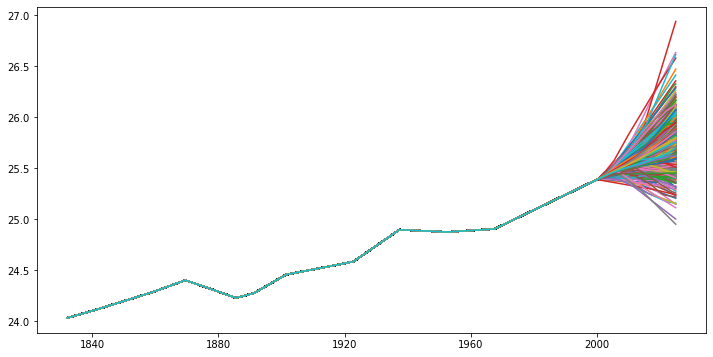

In [86]:
plt.plot(previsao['ds'], amostras['trend']);

#**Aula 5**

In [87]:
modelo = Prophet()
modelo.fit(df_sem_outliers)
dataFramefuture = modelo.make_future_dataframe(periods=300, freq='M')
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


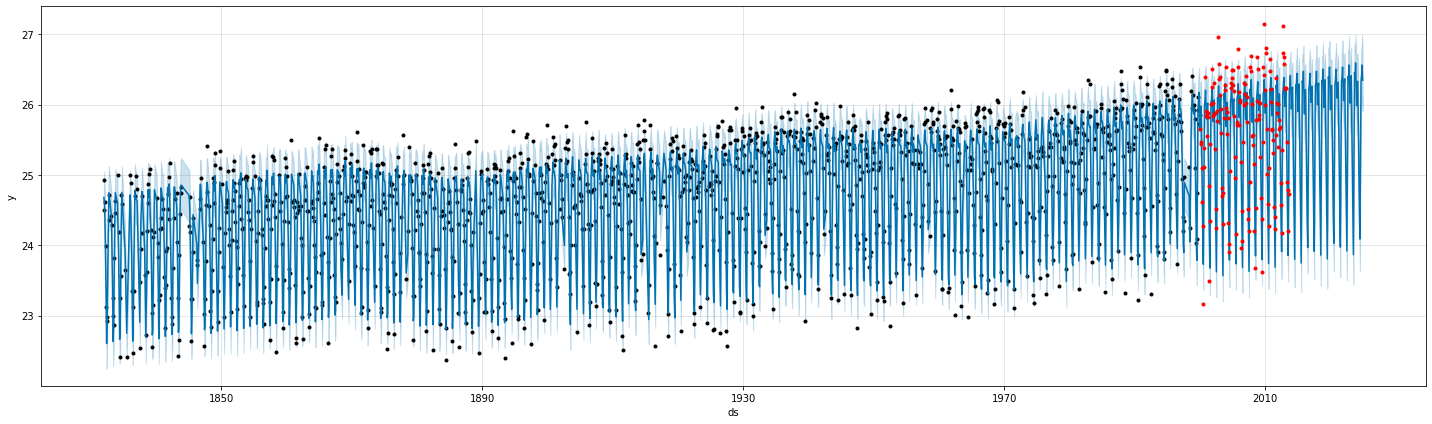

In [88]:
modelo.plot(previsao, figsize=(20,6));
plt.plot(df_teste['ds'], df_teste['y'], '.r')

###**Validação cruzada**

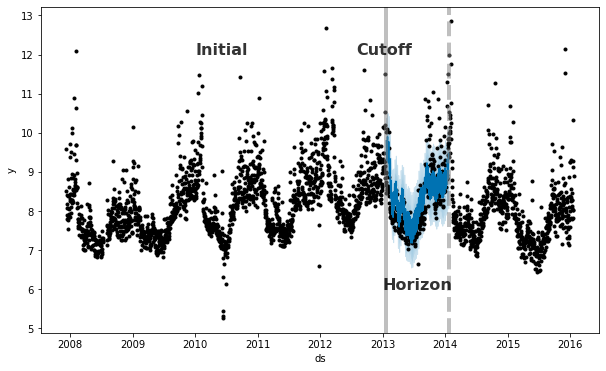

In [89]:
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric

In [90]:
df_cv=cross_validation(modelo, initial='7300 days', period='1865 days', horizon='3650 days')

INFO:fbprophet:Making 28 forecasts with cutoffs between 1852-01-21 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

In [91]:
df_cv

ds       yhat  yhat_lower  yhat_upper       y     cutoff
0    1852-02-01  25.052249   24.775267   25.383299  24.767 1852-01-21
1    1852-03-01  24.660644   24.363039   24.950457  24.331 1852-01-21
2    1852-04-01  24.054215   23.775181   24.335647  24.065 1852-01-21
3    1852-05-01  23.477485   23.199177   23.763363  23.972 1852-01-21
4    1852-06-01  23.052659   22.752947   23.349423  23.099 1852-01-21
...         ...        ...         ...         ...     ...        ...
2809 1999-08-01  24.753961   24.389067   25.093472  24.743 1989-12-03
2810 1999-09-01  25.726045   25.375013   26.084224  26.109 1989-12-03
2811 1999-10-01  25.848112   25.478438   26.175326  25.922 1989-12-03
2812 1999-11-01  26.005776   25.633170   26.361664  25.723 1989-12-03
2813 1999-12-01  25.780916   25.409108   26.136489  25.855 1989-12-03

[2814 rows x 6 columns]

In [92]:
df_cv['cutoff'].unique()

array(['1852-01-21T00:00:00.000000000', '1857-02-28T00:00:00.000000000',
       '1862-04-08T00:00:00.000000000', '1867-05-17T00:00:00.000000000',
       '1872-06-24T00:00:00.000000000', '1877-08-02T00:00:00.000000000',
       '1882-09-10T00:00:00.000000000', '1887-10-19T00:00:00.000000000',
       '1892-11-26T00:00:00.000000000', '1898-01-04T00:00:00.000000000',
       '1903-02-13T00:00:00.000000000', '1908-03-23T00:00:00.000000000',
       '1913-05-01T00:00:00.000000000', '1918-06-09T00:00:00.000000000',
       '1923-07-18T00:00:00.000000000', '1928-08-25T00:00:00.000000000',
       '1933-10-03T00:00:00.000000000', '1938-11-11T00:00:00.000000000',
       '1943-12-20T00:00:00.000000000', '1949-01-27T00:00:00.000000000',
       '1954-03-07T00:00:00.000000000', '1959-04-15T00:00:00.000000000',
       '1964-05-23T00:00:00.000000000', '1969-07-01T00:00:00.000000000',
       '1974-08-09T00:00:00.000000000', '1979-09-17T00:00:00.000000000',
       '1984-10-25T00:00:00.000000000', '1989-12-03

In [93]:
janela = 5

In [94]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

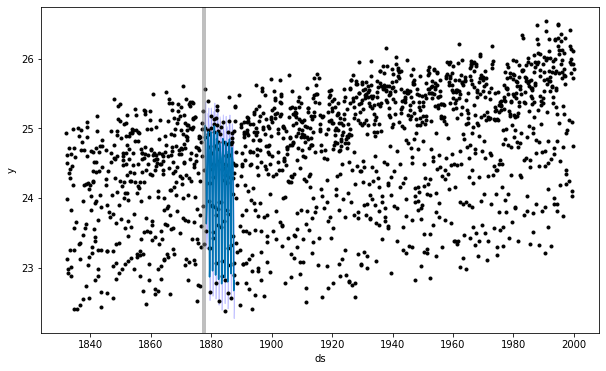

In [95]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'], 
                df_cv_cut['yhat_upper'], color='blue', alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

###**Métricas de Perfomance**

In [96]:
from fbprophet.diagnostics import performance_metrics

In [97]:
df_p = performance_metrics(df_cv)

In [98]:
df_p

horizon       mse      rmse       mae      mape     mdape  coverage
0     357 days  0.086078  0.293390  0.239843  0.009747  0.008474  0.725979
1     358 days  0.086077  0.293389  0.239881  0.009749  0.008474  0.724199
2     359 days  0.085608  0.292589  0.238943  0.009711  0.008365  0.725979
3     362 days  0.085275  0.292019  0.238234  0.009681  0.008365  0.727165
4     363 days  0.085891  0.293071  0.239350  0.009721  0.008474  0.725979
...        ...       ...       ...       ...       ...       ...       ...
1922 3645 days  0.142782  0.377864  0.302554  0.012228  0.010575  0.651246
1923 3646 days  0.142419  0.377384  0.301756  0.012198  0.010169  0.651246
1924 3647 days  0.141918  0.376720  0.300585  0.012147  0.010024  0.651246
1925 3648 days  0.142662  0.377706  0.302141  0.012209  0.010169  0.647687
1926 3650 days  0.141446  0.376093  0.299904  0.012117  0.009738  0.651246

[1927 rows x 7 columns]

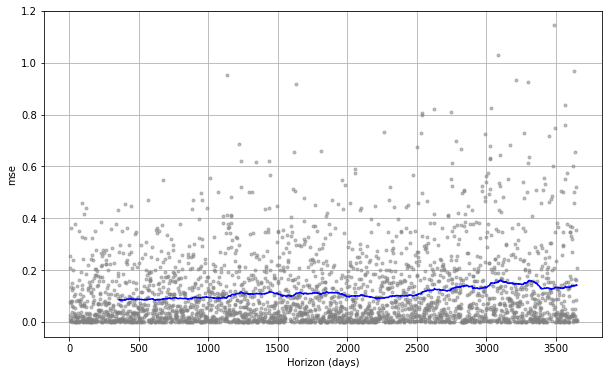

In [99]:
plot_cross_validation_metric(df_cv, metric='mse');

###**Salvando o modelo**

In [100]:
import json

In [101]:
from fbprophet.serialize import model_to_json
from fbprophet.serialize import model_from_json

In [102]:
with open('arquivo.json', 'w') as file_out:
  json.dump(model_to_json(modelo), file_out)

In [103]:
with open('arquivo.json', 'r') as file_in:
  modelo = model_from_json(json.load(file_in))

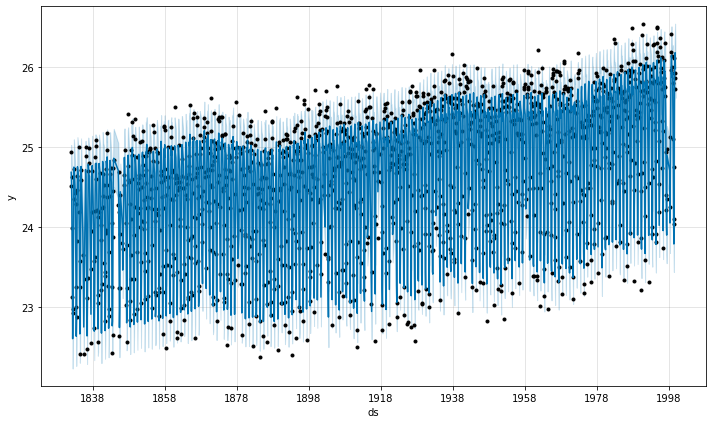

In [104]:
previsao = modelo.predict()
fig = modelo.plot(previsao)

#**Aula 6**

In [105]:
import itertools

In [106]:
param_grid = {'changepoint_prior_scale': [0.5, 0.1, 0.01,
                                          0.001],
              'seasonality_prior_scale': [10.0, 1.0, 0.1,
                                          0.01],
              'seasonality_mode': ['additive',
                                   'multiplicative']}

In [107]:
all_params = [dict(zip(param_grid.keys(), value))
              for value in itertools.product(
                                  *param_grid.values())]
mse_values= []

In [108]:
for params in all_params:
    modelo = Prophet(**params).fit(df_sem_outliers)
    df_cv = cross_validation(modelo, initial='7300 days', period='1825 days', 
                             horizon = '3650 days')
                             
    df_p = performance_metrics(df_cv, rolling_window=1)
    mse_values.append(df_p['mse'].values[0])


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 28 forecasts with cutoffs between 1855-01-05 00:00:00 and 1989-12-03 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

In [111]:
results = pd.DataFrame(all_params)
results['mse'] = mse_values
results

changepoint_prior_scale  seasonality_prior_scale seasonality_mode       mse
0                     0.500                    10.00         additive  0.133142
1                     0.500                    10.00   multiplicative  0.132950
2                     0.500                     1.00         additive  0.133519
3                     0.500                     1.00   multiplicative  0.132761
4                     0.500                     0.10         additive  0.133425
5                     0.500                     0.10   multiplicative  0.133339
6                     0.500                     0.01         additive  0.132934
7                     0.500                     0.01   multiplicative  0.131960
8                     0.100                    10.00         additive  0.122017
9                     0.100                    10.00   multiplicative  0.120976
10                    0.100                     1.00         additive  0.121542
11                    0.100                     1.00   multiplicative  0.120412
12                    0.100                     0.10         additive  0.122350
13                    0.100                     0.10   multiplicative  0.121176
14                    0.100                     0.01         additive  0.120650
15                    0.100                     0.01   multiplicative  0.119935
16                    0.010                    10.00         additive  0.107879
17                    0.010                    10.00   multiplicative  0.107586
18                    0.010                     1.00         additive  0.107155
19                    0.010                     1.00   multiplicative  0.107245
20                    0.010                     0.10         additive  0.108185
21                    0.010                     0.10   multiplicative  0.106909
22                    0.010                     0.01         additive  0.106579
23                    0.010                     0.01   multiplicative  0.106025
24                    0.001                    10.00         additive  0.100279
25                    0.001                    10.00   multiplicative  0.099607
26                    0.001                     1.00         additive  0.100685
27                    0.001                     1.00   multiplicative  0.099584
28                    0.001                     0.10         additive  0.098817
29                    0.001                     0.10   multiplicative  0.097955
30                    0.001                     0.01         additive  0.099819
31                    0.001                     0.01   multiplicative  0.099230

In [112]:
import numpy as np

In [113]:
best_params = all_params[np.argmin(mse_values)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


In [114]:
modelo = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale = 0.1, seasonality_mode= 'multiplicative')
modelo.fit(df_sem_outliers)
dataFramefuture = modelo.make_future_dataframe(periods=300, freq='M')
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


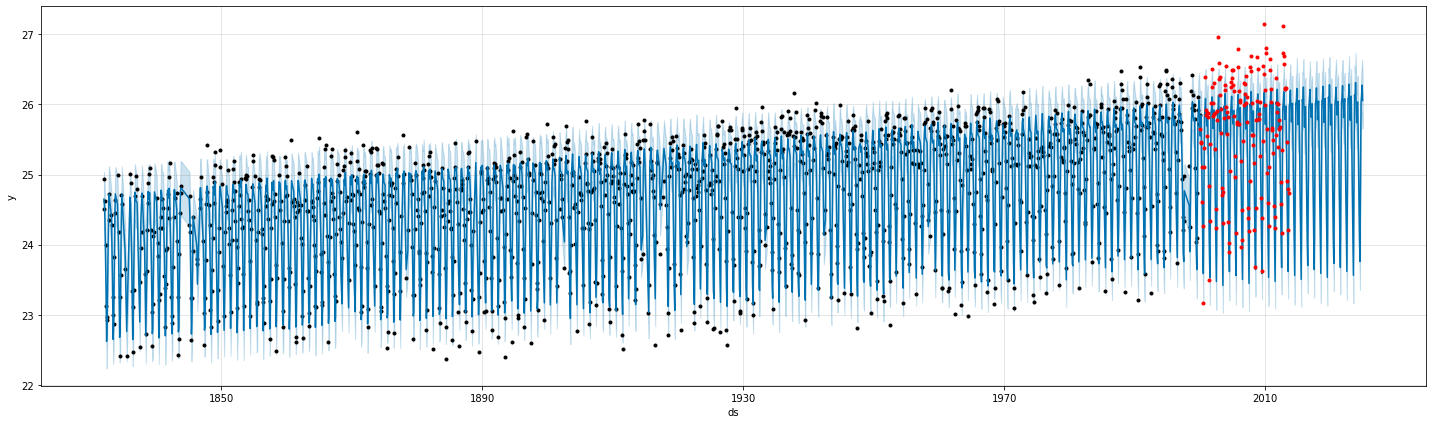

In [115]:
modelo.plot(previsao, figsize=(20,6));
plt.plot(df_teste['ds'], df_teste['y'], '.r')

###**Plotando gráficos interativos**

In [116]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import cufflinks as cf

In [117]:
from fbprophet.plot import (
    plot_plotly,
    plot_components_plotly,
    plot_forecast_component_plotly,
    plot_seasonality_plotly
)

In [118]:
fig = plot_plotly(modelo, previsao)
py.iplot(fig)

In [119]:
fig = plot_plotly(modelo, previsao, trend=True)
py.iplot(fig)

In [120]:
fig = plot_components_plotly(modelo, previsao, figsize=(800,175))
py.iplot(fig)

In [121]:
fig = plot_seasonality_plotly(modelo, 'yearly')
py.iplot(fig)